In [43]:
import numpy as np
from matplotlib import pyplot as plt

## Q2 (a)

In [51]:
def exact_mean_var(x):
    global mu,sigma
    exact_mean=np.exp(x)
    exact_var=np.exp(2*mu*x)*(np.exp(sigma**2*x)-1)
    
    return exact_mean,exact_var

In [52]:
def Brownian(n):

    dt=1/n
    w=np.zeros((10**4,n+1))
    w[:,0]=0.
    noise=np.random.normal(0,np.sqrt(dt),size=(10**4,n))
    w[:,1:]=noise
    
    for i in range(1,n+1):
        w[:,i]=w[:,i]+w[:,i-1]
    
    return w

In [53]:
def Xt(noise,n):
    global mu,sigma
    dt=1/n
    
    xt=np.zeros((10**4,n+1))
    xt[:,0]=1.0
    for i in range(1,n+1):
        xt[:,i]=np.exp((mu-0.5*sigma**2)*i*dt+sigma*noise[:,i])
        

    return xt

In [54]:
def Euler_Maruyama(noise,n):
    global mu,sigma
    
    dt=1/n
    
    yt=np.zeros((10**4,n+1))
    yt[:,0]=1.0
    for i in range(1,n+1):
        yt[:,i]=yt[:,i-1]+mu*yt[:,i-1]*dt+sigma*yt[:,i-1]*(noise[:,i]-noise[:,i-1])
        
    return yt

In [55]:
def Milstein(noise,n):
    global mu,sigma
    
    dt=1/n
    yt=np.zeros((10**4,n+1))
    yt[:,0]=1.0
    
    for i in range(1,n+1):
        yt[:,i]=yt[:,i-1]+mu*yt[:,i-1]*dt+sigma*yt[:,i-1]*(noise[:,i]-noise[:,i-1])+0.5*sigma**2*yt[:,i-1]\
        *((noise[:,i]-noise[:,i-1])**2-dt)
        
    return yt

In [56]:
n2=64
n1=256
n0=1024
W=Brownian(n0)
noise256=np.zeros((10**4,n1+1))
noise64=np.zeros((10**4,n2+1))
for i in range(1,n1+1):
    noise256[:,i]=W[:,4*i]
for i in range(1,n2+1):
    noise64[:,i]=W[:,16*i]    

Yt256=Euler_Maruyama(noise256,n1)
mu=1.0
sigma=1.0
Yt256m=Milstein(noise256,n1)
X=Xt(W,n0)


In [57]:
n2=64
#W=Brownian(n2)
Yt64=Euler_Maruyama(noise64,n2)
Yt64m=Milstein(noise64,n2)



In [58]:
#X=Xt(W,n)
mean,var=exact_mean_var(np.linspace(0,1,1001))
print(mean)

[1.         1.0010005  1.002002   ... 2.7128507  2.71556491 2.71828183]


Text(0.5, 1.0, '$E(X_t)$')

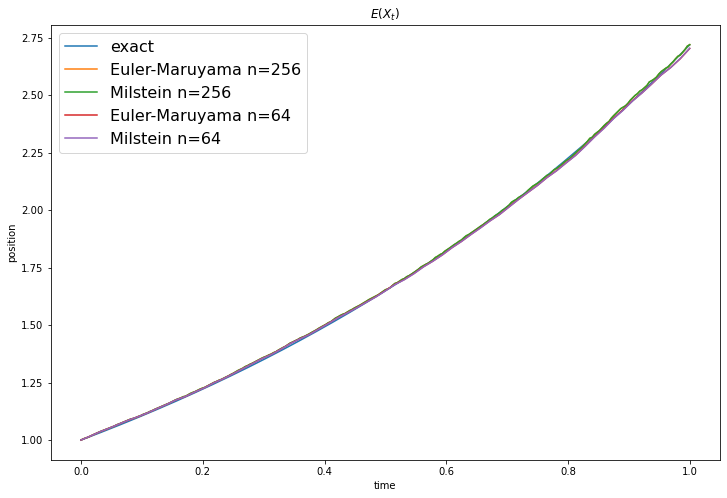

In [59]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,1001),mean,label='exact')
plt.plot(np.linspace(0,1,n1+1),np.mean(Yt256,axis=0),label='Euler-Maruyama n=256')
plt.plot(np.linspace(0,1,n1+1),np.mean(Yt256m,axis=0),label='Milstein n=256')
plt.plot(np.linspace(0,1,n2+1),np.mean(Yt64,axis=0),label='Euler-Maruyama n=64')
plt.plot(np.linspace(0,1,n2+1),np.mean(Yt64m,axis=0),label='Milstein n=64')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(fontsize=16)
plt.title(r'$E(X_t)$')

Text(0.5, 1.0, 'Var$(X_t)$')

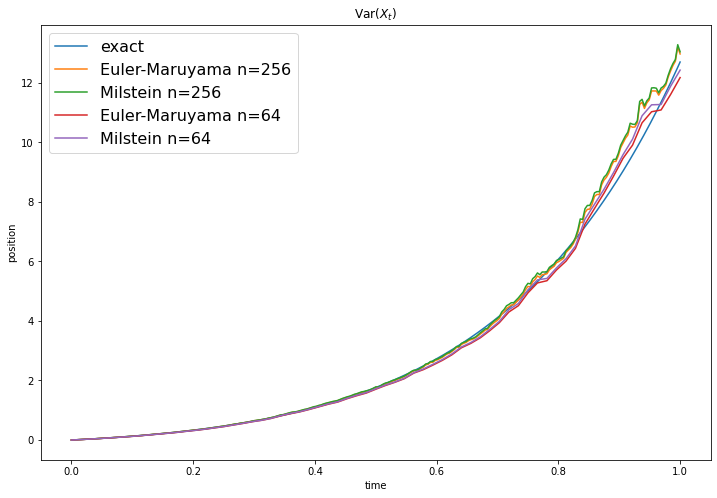

In [60]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,1001),var,label='exact')
plt.plot(np.linspace(0,1,n1+1),np.var(Yt256,axis=0),label='Euler-Maruyama n=256')
plt.plot(np.linspace(0,1,n1+1),np.var(Yt256m,axis=0),label='Milstein n=256')
plt.plot(np.linspace(0,1,n2+1),np.var(Yt64,axis=0),label='Euler-Maruyama n=64')
plt.plot(np.linspace(0,1,n2+1),np.var(Yt64m,axis=0),label='Milstein n=64')
plt.xlabel('time')
plt.ylabel('position')
plt.legend(fontsize=16)
plt.title(r'Var$(X_t)$')

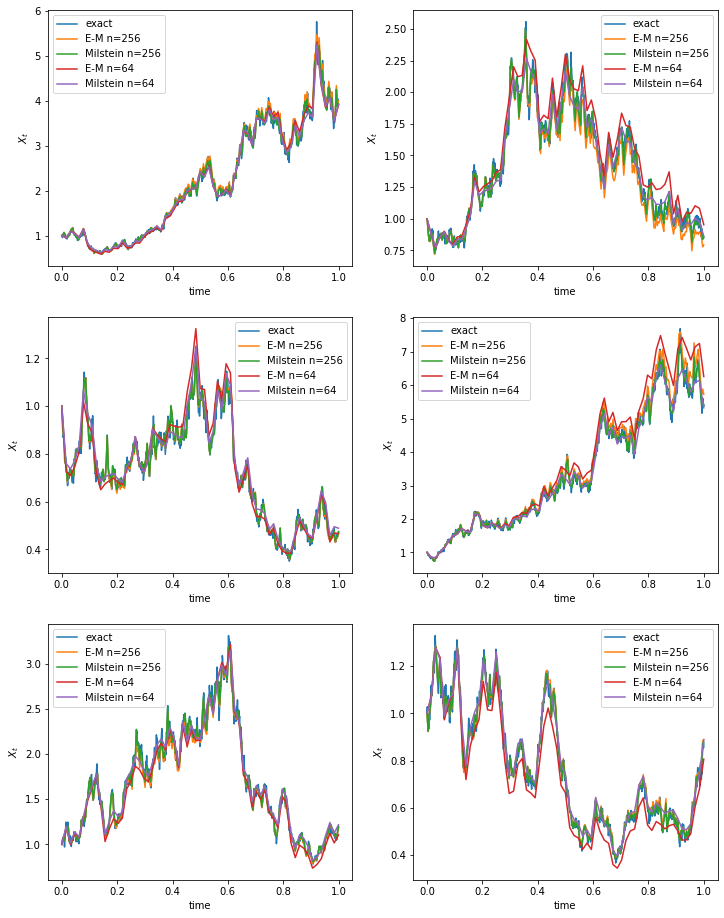

In [637]:
fig, axs = plt.subplots(3, 2,figsize=(12,16))
axs[0, 0].plot(np.linspace(0,1,n0+1), X[10],label='exact')
axs[0, 0].plot(np.linspace(0,1,n1+1), Yt256[10],label='E-M n=256')
axs[0, 0].plot(np.linspace(0,1,n1+1), Yt256m[10],label='Milstein n=256')
axs[0, 0].plot(np.linspace(0,1,n2+1), Yt64[10],label='E-M n=64')
axs[0, 0].plot(np.linspace(0,1,n2+1), Yt64m[10],label='Milstein n=64')


axs[0, 1].plot(np.linspace(0,1,n0+1), X[20],label='exact')
axs[0, 1].plot(np.linspace(0,1,n1+1), Yt256[20],label='E-M n=256')
axs[0, 1].plot(np.linspace(0,1,n1+1), Yt256m[20],label='Milstein n=256')
axs[0, 1].plot(np.linspace(0,1,n2+1), Yt64[20],label='E-M n=64')
axs[0, 1].plot(np.linspace(0,1,n2+1), Yt64m[20],label='Milstein n=64')

axs[1, 0].plot(np.linspace(0,1,n0+1), X[30],label='exact')
axs[1, 0].plot(np.linspace(0,1,n1+1), Yt256[30],label='E-M n=256')
axs[1, 0].plot(np.linspace(0,1,n1+1), Yt256m[30],label='Milstein n=256')
axs[1, 0].plot(np.linspace(0,1,n2+1), Yt64[30],label='E-M n=64')
axs[1, 0].plot(np.linspace(0,1,n2+1), Yt64m[30],label='Milstein n=64')

axs[1,1].plot(np.linspace(0,1,n0+1), X[40],label='exact')
axs[1, 1].plot(np.linspace(0,1,n1+1), Yt256[40],label='E-M n=256')
axs[1, 1].plot(np.linspace(0,1,n1+1), Yt256m[40],label='Milstein n=256')
axs[1, 1].plot(np.linspace(0,1,n2+1), Yt64[40],label='E-M n=64')
axs[1, 1].plot(np.linspace(0,1,n2+1), Yt64m[40],label='Milstein n=64')

axs[2, 0].plot(np.linspace(0,1,n0+1), X[50],label='exact')
axs[2, 0].plot(np.linspace(0,1,n1+1), Yt256[50],label='E-M n=256')
axs[2, 0].plot(np.linspace(0,1,n1+1), Yt256m[50],label='Milstein n=256')
axs[2, 0].plot(np.linspace(0,1,n2+1), Yt64[50],label='E-M n=64')
axs[2, 0].plot(np.linspace(0,1,n2+1), Yt64m[50],label='Milstein n=64')

axs[2, 1].plot(np.linspace(0,1,n0+1), X[6],label='exact')
axs[2, 1].plot(np.linspace(0,1,n1+1), Yt256[6],label='E-M n=256')
axs[2, 1].plot(np.linspace(0,1,n1+1), Yt256m[6],label='Milstein n=256')
axs[2, 1].plot(np.linspace(0,1,n2+1), Yt64[6],label='E-M n=64')
axs[2, 1].plot(np.linspace(0,1,n2+1), Yt64m[6],label='Milstein n=64')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel=r'$X_t$')
    ax.legend()

## Q2 (b)

In [370]:
weak_errE=np.zeros(6)
stron_errE=np.zeros(6)
weak_errM=np.zeros(6)
stron_errM=np.zeros(6)
for i in np.arange(5,11):
    
    n1=2**i
    W=Brownian(n1)
    YtE=Euler_Maruyama(W,n1)
    YtE_mean=np.mean(YtE,axis=0)
    mu=1.0
    sigma=1.0
    YtM=Milstein(W,n1)
    YtM_mean=np.mean(YtM,axis=0)
    mean,var=exact_mean_var(np.linspace(0,1,n1+1))
    X_mean=np.mean(Xt(W,n1),axis=0)
    
    weak_errE[i-5]=np.max(np.abs(YtE_mean-X_mean))
    weak_errM[i-5]=np.max(np.abs(YtM_mean-X_mean))


0.988623644452118
1.08955126192557
1.066137875419274
1.1589678944426882
0.9435987275555713
0.9375546221511267
0.582761199825702
0.5168221216779852
0.4761450387941712
0.5931652700285017
0.6658692407452766
0.7835790422797196
0.9869321879994567
0.7766531278207693
0.9074781576383585
1.0363133939135782
1.0372993853016321
0.6845376666657402
0.8049422561273397
0.7693744734556525
0.6550073155298041
0.8278188135907192
0.6320692881513702
0.6777970151129235
0.6634978907958613
0.5489024404423385
0.5288351136293504
0.40070016255996105
0.3958806513231161
0.4772868143731828
0.6610076753888245
0.7521765215807402
1.0038834519889444
1.0309384664095456
1.0130215541121048
0.8632221442544525
0.8290427617806277
0.6488195775114468
0.6326197256700565
0.566460287425572
0.5723549023915071
0.6415880452093301
0.52262495999886
0.5659691437913933
0.5318472331313833
0.6142195938200183
0.6970053043890769
0.6605236852469655
0.7771759940511219
0.8669565065287166
0.8371799345384883
0.8028421636618454
0.8619286753627468


In [371]:
print(weak_errE)
h=np.zeros(6)
for i in np.arange(5,11):
    h[i-5]=1/2**i
print(h)
print(weak_errE)

[0.041176   0.01558713 0.01029294 0.00538729 0.0024736  0.00228666]
[0.03125    0.015625   0.0078125  0.00390625 0.00195312 0.00097656]
[0.041176   0.01558713 0.01029294 0.00538729 0.0024736  0.00228666]


slope of weak error(Euler-Maruyama)= 0.8340981537647584
slope of weak error(Milstein)= 1.00297945086331


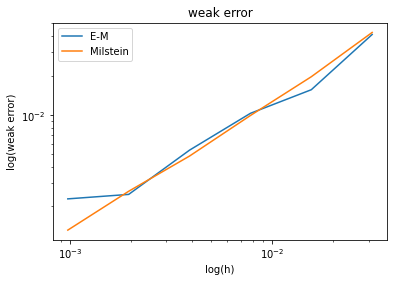

In [372]:

plt.loglog(h,weak_errE,label='E-M')
plt.loglog(h,weak_errM,label='Milstein')
plt.legend()
plt.title('weak error')
plt.xlabel('log(h)')
plt.ylabel('log(weak error)')
#h=np.log(h[::-1])
print('slope of weak error(Euler-Maruyama)=',(np.log(weak_errE)[5]-np.log(weak_errE)[0])/(np.log(h[5])-np.log(h[0])))
print('slope of weak error(Milstein)=',(np.log(weak_errM)[5]-np.log(weak_errM)[0])/(np.log(h[5])-np.log(h[0])))

In [379]:
strong_errE=np.zeros(6)
strong_errE=np.zeros(6)
strong_errM=np.zeros(6)
strong_errM=np.zeros(6)
for i in np.arange(5,11):
    
    n1=2**i
    W=Brownian(n1)
    X=Xt(W,n1)
    YtE=Euler_Maruyama(W,n1)
    YtE_mean=np.mean(YtE,axis=0)
    del_YtE=np.abs(YtE-X)
    mu=1.0
    sigma=1.0
    YtM=Milstein(W,n1)
    del_YtM=np.abs(YtM-X)
    YtM_mean=np.mean(YtM,axis=0)
    mean,var=exact_mean_var(np.linspace(0,1,n1+1))

    
    weak_errE[i-5]=np.max(np.mean(del_YtE,axis=0))
    weak_errM[i-5]=np.max(np.mean(del_YtM,axis=0))


0.9579389273768086
0.7974806225609965
0.8923647270363676
0.8013693758342428
0.6792645872988735
0.7833242909496723
1.0034036971172813
0.8291898841504816
0.8270503456919613
0.7003853781339036
0.5764690244138924
0.5302899551299055
0.6267865297285059
0.6761524958590148
0.760406586944542
0.5679699935816561
0.5922208071972438
0.5838043487345063
0.5373966311169023
0.5766712954212452
0.4657061440021624
0.46305631671537756
0.43547465701912164
0.4999790010512982
0.48429014053535896
0.4854028763250941
0.5305839390221376
0.37589970348443674
0.3890358779121446
0.36222670037650834
0.47360440086372974
0.4078165316519139
1.0059672299366624
0.8770290892592545
0.9162131515127342
0.7920379025558986
0.7400664991410584
0.8420144115147433
0.8321464597513873
0.7808689881505106
0.82753896676358
0.77452518476656
0.670867119113414
0.799644459497962
0.8314614824748314
0.8443877971657984
0.745094445498357
0.7189451904605282
0.6843844329082498
0.7857063072901088
0.6158616418624425
0.5458401858788445
0.748179481270

[0.26568333 0.19874242 0.13638522 0.0955581  0.06789534 0.04852519]
slope of weak error(Euler-Maruyama)= 0.4905803768571019
slope of weak error(Milstein)= 0.9911097480761728


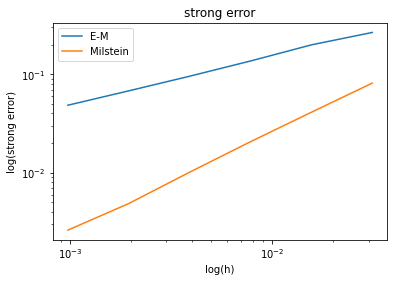

In [380]:
print(weak_errE)
h=np.zeros(6)
for i in np.arange(5,11):
    h[i-5]=1/2**i



plt.loglog(h,weak_errE,label='E-M')
plt.loglog(h,weak_errM,label='Milstein')
plt.legend()
plt.title('strong error')
plt.xlabel('log(h)')
plt.ylabel('log(strong error)')
#h=np.log(h[::-1])
print('slope of weak error(Euler-Maruyama)=',(np.log(weak_errE)[5]-np.log(weak_errE)[0])/(np.log(h[5])-np.log(h[0])))
print('slope of weak error(Milstein)=',(np.log(weak_errM)[5]-np.log(weak_errM)[0])/(np.log(h[5])-np.log(h[0])))

In [273]:
mean=np.mean(X,axis=0)
var=np.var(X,axis=0)


In [38]:
def exact_mean_var(x):
    global mu,sigma
    exact_mean=np.exp(x)
    exact_var=np.exp(2*mu*x)*(np.exp(sigma**2*x)-1)
    
    return exact_mean,exact_var

## Q3

In [94]:
def Euler_Maruyama(noise,n):
    global mu,sigma
    
    dt=10/n
    
    yt=np.zeros((10**3,n+1))
    yt[:,0]=4.0
    for i in range(1,n+1):
        yt[:,i]=yt[:,i-1]-(yt[:,i-1]**3)*dt+np.sqrt(2)*(noise[:,i]-noise[:,i-1])
        
    return yt

In [95]:
def Brownian(n):

    dt=10/n
    w=np.zeros((10**3,n+1))
    w[:,0]=0.
    noise=np.random.normal(0,np.sqrt(dt),size=(10**3,n))
    w[:,1:]=noise
    
    for i in range(1,n+1):
        w[:,i]=w[:,i]+w[:,i-1]
    
    return w

In [96]:
n=10**5
W=Brownian(n)
Yt_exact=Euler_Maruyama(W,n)
mu=1.0
sigma=1.0
print(Yt_exact.shape)



(1000, 100001)


Text(0, 0.5, '$E(X_t)$')

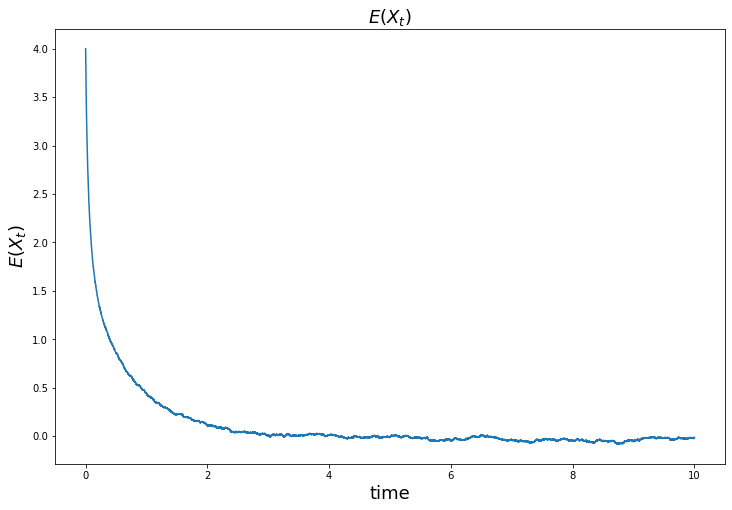

In [97]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,10,n+1),np.mean(Yt_exact,axis=0))
plt.title(r'$E(X_t)$',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.ylabel(r'$E(X_t)$',fontsize=18)

Text(0, 0.5, 'Var$(X_t)$')

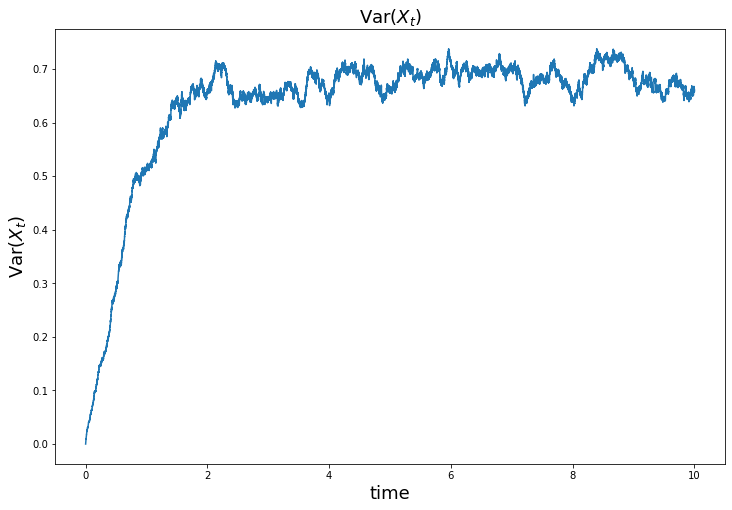

In [98]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,10,n+1),np.var(Yt_exact,axis=0))
plt.title(r'Var$(X_t)$',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.ylabel(r'Var$(X_t)$',fontsize=18)

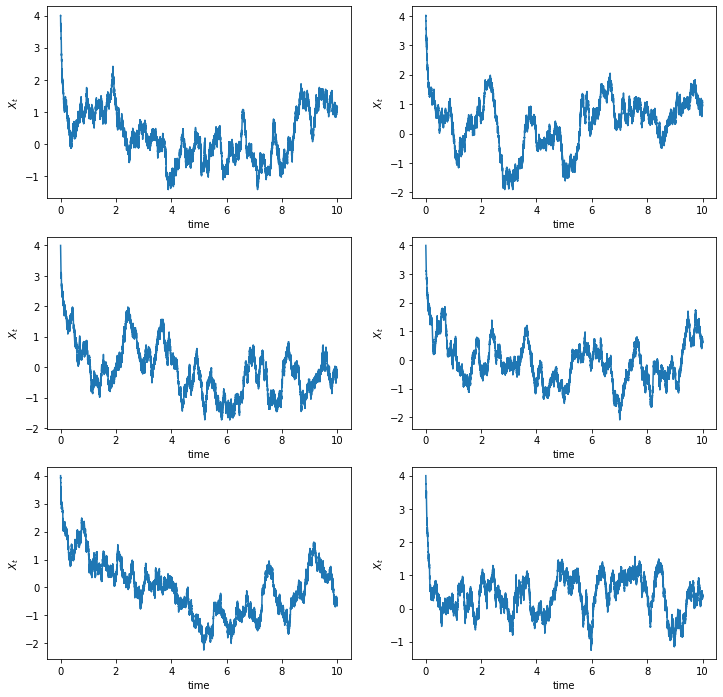

In [99]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))

axs[0, 0].plot(np.linspace(0,10,n+1), Yt_exact[10])


axs[0, 1].plot(np.linspace(0,10,n+1), Yt_exact[20])




axs[1, 0].plot(np.linspace(0,10,n+1), Yt_exact[30])




axs[1, 1].plot(np.linspace(0,10,n+1), Yt_exact[40])


axs[2, 0].plot(np.linspace(0,10,n+1), Yt_exact[50])




axs[2, 1].plot(np.linspace(0,10,n+1), Yt_exact[6])



for ax in axs.flat:
    ax.set(xlabel='time', ylabel=r'$X_t$')


In [100]:




n=int(10/0.3125)

noise=np.zeros((10**3,n+1))
for i in range(n+1):
    noise[:,i]=W[:,3125*i-1]
Yt256=Euler_Maruyama(noise,n)
mu=1.0
sigma=1.0
print(Yt256.shape)

(1000, 33)


C:\Users\yijia\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
C:\Users\yijia\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


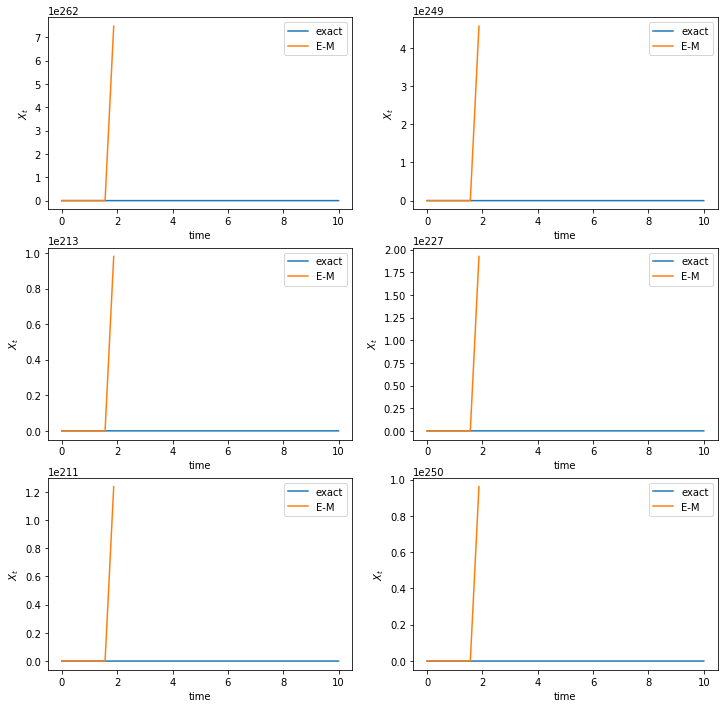

In [101]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
n1=10**5
axs[0, 0].plot(np.linspace(0,10,n1+1), Yt_exact[10],label='exact')
axs[0, 0].plot(np.linspace(0,10,n+1), Yt256[10],label='E-M')


axs[0, 1].plot(np.linspace(0,10,n1+1), Yt_exact[20],label='exact')
axs[0, 1].plot(np.linspace(0,10,n+1), Yt256[20],label='E-M')



axs[1, 0].plot(np.linspace(0,10,n1+1), Yt_exact[30],label='exact')
axs[1, 0].plot(np.linspace(0,10,n+1), Yt256[30],label='E-M')



axs[1, 1].plot(np.linspace(0,10,n1+1), Yt_exact[40],label='exact')
axs[1, 1].plot(np.linspace(0,10,n+1), Yt256[40],label='E-M')

axs[2, 0].plot(np.linspace(0,10,n1+1), Yt_exact[50],label='exact')
axs[2, 0].plot(np.linspace(0,10,n+1), Yt256[50],label='E-M')



axs[2, 1].plot(np.linspace(0,10,n1+1), Yt_exact[6],label='exact')
axs[2, 1].plot(np.linspace(0,10,n+1), Yt256[6],label='E-M')


for ax in axs.flat:
    ax.set(xlabel='time', ylabel=r'$X_t$')
    ax.legend()

Text(0, 0.5, '$E(X_t)$')

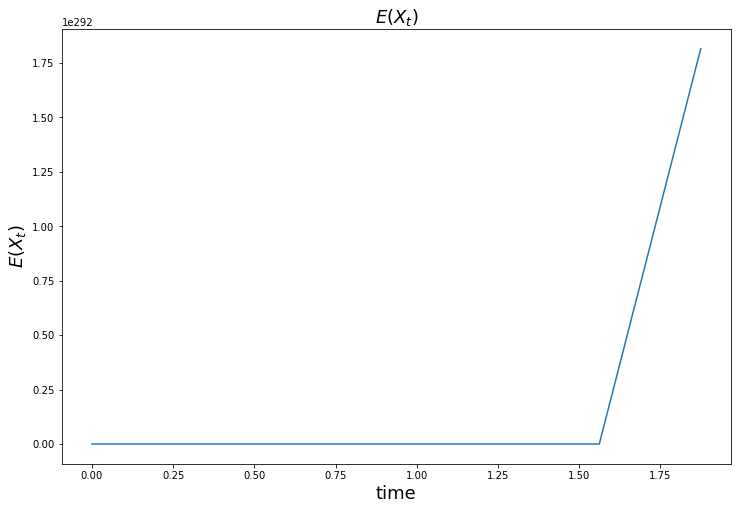

In [102]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,10,n+1),np.mean(Yt256,axis=0))
plt.title(r'$E(X_t)$',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.ylabel(r'$E(X_t)$',fontsize=18)

C:\Users\yijia\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\yijia\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Text(0, 0.5, 'Var$(X_t)$')

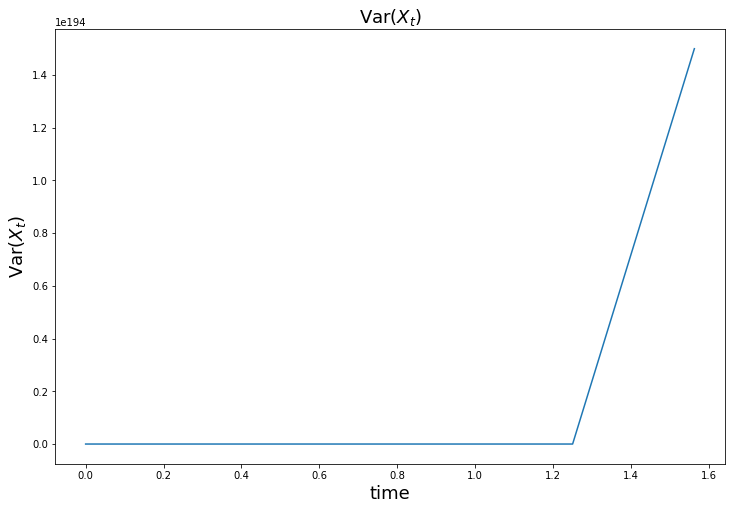

In [103]:

plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,10,n+1),np.var(Yt256,axis=0))
plt.title(r'Var$(X_t)$',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.ylabel(r'Var$(X_t)$',fontsize=18)

In [104]:
def acceptance_rate(x,y,h):
    alpha=np.exp(-(y**4/4-x**4/4+(np.abs(x-y+h*y**3)**2)/(4*h)-(np.abs(y-x+h*x**3)**2)/(4*h)))
    
    return alpha

In [105]:
n=int(10/0.3125)
dt=0.3125
Yt=np.zeros((10**3,n+1))
Yt[:,0]=4.0







    
    
for i in range(10**3):
    for j in range(1,n+1):
        W=noise[i]
        if np.abs(Yt[i,j-1]**3)<1/dt:
            y=Yt[i,j-1]-Yt[i,j-1]**3*dt+np.sqrt(2)*(W[j]-W[j-1])
        else:
            y=Yt[i,j-1]-1+np.sqrt(2)*(W[j]-W[j-1])
        alpha=acceptance_rate(Yt[i,j-1],y,dt)
        
        seed=np.random.uniform(0,1)
        if alpha>=1.0:
            Yt[i,j]=y
        else:
            if seed<=alpha:
                Yt[i,j]=y
            else:
                Yt[i,j]=Yt[i,j-1]

            

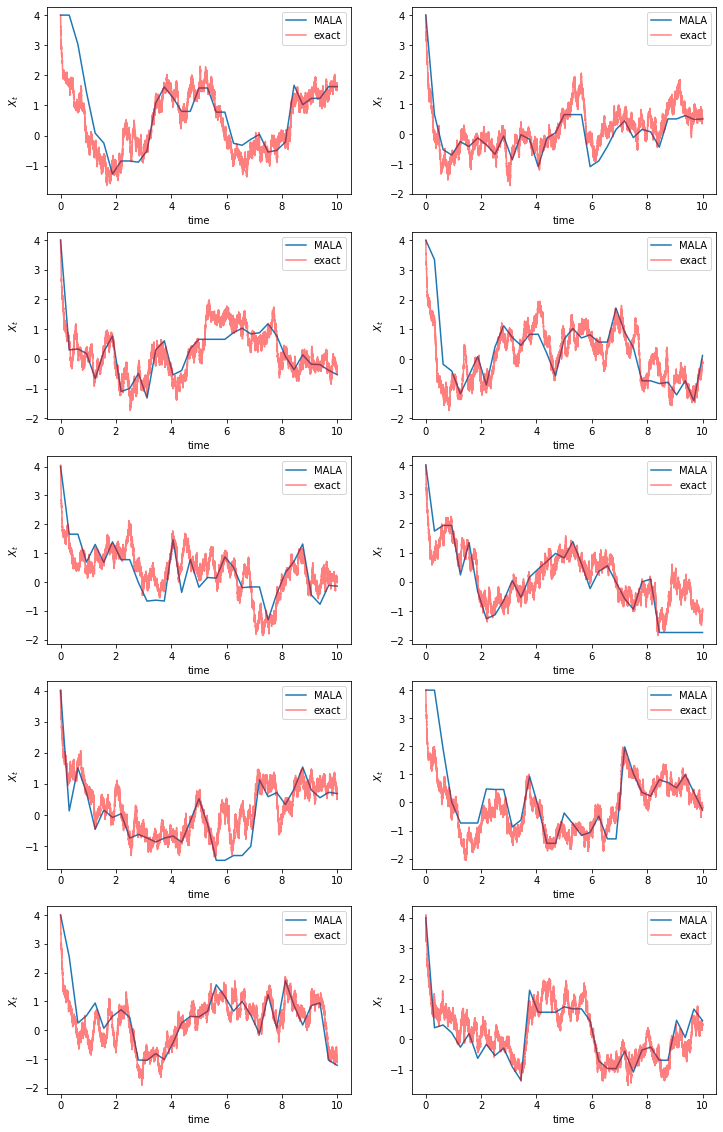

In [128]:
fig, axs = plt.subplots(5, 2,figsize=(12,20))
axs[0, 0].plot(np.linspace(0,10,n+1),Yt[79],label='MALA')
axs[0, 0].plot(np.linspace(0,10,10**5+1),Yt_exact[79],label='exact',color='r',alpha=0.5)


axs[0, 1].plot(np.linspace(0,10,n+1),Yt[91],label='MALA')
axs[0, 1].plot(np.linspace(0,10,10**5+1),Yt_exact[91],label='exact',color='r',alpha=0.5)

axs[1, 0].plot(np.linspace(0,10,n+1),Yt[105],label='MALA')
axs[1, 0].plot(np.linspace(0,10,10**5+1),Yt_exact[105],label='exact',color='r',alpha=0.5)

axs[1, 1].plot(np.linspace(0,10,n+1),Yt[106],label='MALA')
axs[1, 1].plot(np.linspace(0,10,10**5+1),Yt_exact[106],label='exact',color='r',alpha=0.5)

axs[2, 0].plot(np.linspace(0,10,n+1),Yt[118],label='MALA')
axs[2, 0].plot(np.linspace(0,10,10**5+1),Yt_exact[118],label='exact',color='r',alpha=0.5)

axs[2, 1].plot(np.linspace(0,10,n+1),Yt[132],label='MALA')
axs[2, 1].plot(np.linspace(0,10,10**5+1),Yt_exact[132],label='exact',color='r',alpha=0.5)

axs[3, 0].plot(np.linspace(0,10,n+1),Yt[147],label='MALA')
axs[3, 0].plot(np.linspace(0,10,10**5+1),Yt_exact[147],label='exact',color='r',alpha=0.5)

axs[3, 1].plot(np.linspace(0,10,n+1),Yt[154],label='MALA')
axs[3, 1].plot(np.linspace(0,10,10**5+1),Yt_exact[154],label='exact',color='r',alpha=0.5)

axs[4, 0].plot(np.linspace(0,10,n+1),Yt[162],label='MALA')
axs[4, 0].plot(np.linspace(0,10,10**5+1),Yt_exact[162],label='exact',color='r',alpha=0.5)

axs[4, 1].plot(np.linspace(0,10,n+1),Yt[167],label='MALA')
axs[4, 1].plot(np.linspace(0,10,10**5+1),Yt_exact[167],label='exact',color='r',alpha=0.5)

for ax in axs.flat:
    ax.set(xlabel='time', ylabel=r'$X_t$')
    ax.legend(loc='upper right')


In [ ]:
# standard MALA

n=int(10/0.3125)
dt=0.3125
Yt=np.zeros((10**3,n+1))
Yt[:,0]=4.0







    
    
for i in range(10**3):
    for j in range(1,n+1):
        W=noise[i]
        y=Yt[i,j-1]-Yt[i,j-1]**3*dt+np.sqrt(2)*(W[j]-W[j-1])
        
        alpha=acceptance_rate(Yt[i,j-1],y,dt)
        
        seed=np.random.uniform(0,1)
        if alpha>=1.0:
            Yt[i,j]=y
        else:
            if seed<=alpha:
                Yt[i,j]=y
            else:
                Yt[i,j]=Yt[i,j-1]

            


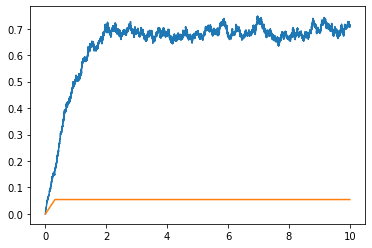

In [76]:
plt.plot(np.linspace(0,10,10**5+1),np.var(Yt_exact,axis=0))
plt.plot(np.linspace(0,10,n+1),np.var(Yt,axis=0))

Text(0, 0.5, '$X_t$')

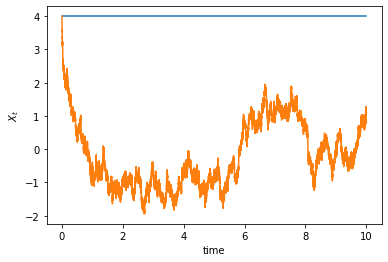

In [77]:

plt.plot(np.linspace(0,10,n+1),Yt[166])
plt.plot(np.linspace(0,10,10**5+1),Yt_exact[166])
plt.xlabel('time')
plt.ylabel(r'$X_t$')